In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Preparing the Data before networkx

This section will be commented out because it relies on large csv files that I used to create the files I use for analysis. Refer to the ReadMe file and the comments in the below code for more details.

In [58]:
# df = pd.read_csv('cast.csv')
# df.head()
# df.shape

In [59]:
# roi = pd.read_csv('df_roi.csv')
# # roi.head()

In [60]:
# cast = df[df['movie_id'].isin(set(roi['movie_id']))]
# cast.head()
# cast.shape 
# # now you are working with a df of 120k rows instead of 560k

In [61]:
# cast.drop(['Unnamed: 0','0','credit_id'], axis=1, inplace=True)
# cast.head()

In [8]:
# subset for Top 100 FEMALE actors:

In [62]:
# women = cast[cast['gender']==1]
# women = women[['movie_id', 'name']]
# women

In [63]:
# men = cast[cast['gender']==2]
# men = men[['movie_id', 'name']]
# men.head()

In [14]:
# now you have just male and just female actors, get df with just top 100 of each

In [64]:
# top100women = women.pivot_table(values='movie_id', index='name', aggfunc='count').sort_values('movie_id', ascending=False).head(100)
# top100women.reset_index(inplace=True) 

# women100 = women[women['name'].isin(top100women['name'])]
# # women['name'].value_counts() # make sure it worked. Len=100
# women100

In [53]:
# save df to csv file for analysis:

# women100.to_csv('top100_women.csv')

In [65]:
# top100men = men.pivot_table(values='movie_id', index='name', aggfunc='count').sort_values('movie_id', ascending=False).head(100)
# top100men.reset_index(inplace=True)

# men100 = men[men['name'].isin(top100men['name'])]
# # men['name'].value_counts() # make sure it worked. Len=100
# men100

In [56]:
# save df to csv file for analysis:

# men100.to_csv('top100_men.csv')

## Network of female actors in movie database:

In [73]:
women100 = pd.read_csv('top100_women.csv')
women100.head()
# drop columns: 
women100.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
women100.head()

,movie_id,name
0,8844,Kirsten Dunst
1,8844,Patricia Clarkson
2,31357,Angela Bassett
3,949,Ashley Judd
4,949,Natalie Portman


#### Top 100 Women in Hollywood

In [74]:
# make dictionary with movie_id and all actors:
f_movie_dict = women100.groupby('movie_id')['name'].apply(list).to_dict()
len(f_movie_dict)

1708

In [38]:
from itertools import combinations

In [95]:
tuples_f = []
for i in f_movie_dict.values():
    for x in combinations(i, 2):
        x = tuple(sorted(x))
        tuples_f.append(x)
        
tuples_f

# now only duplicates:

dup_tuples_f = list(set([e for e in tuples_f if tuples_f.count(e) >= 3]))
dup_tuples_f

[('Drew Barrymore', 'Julia Roberts'),
 ('Anna Kendrick', 'Kristen Stewart'),
 ('Ashley Judd', 'Octavia Spencer'),
 ('Anne Hathaway', 'Helena Bonham Carter'),
 ('Helena Bonham Carter', 'Maggie Smith'),
 ('Judi Dench', 'Maggie Smith'),
 ('Anna Kendrick', 'Elizabeth Banks'),
 ('Elizabeth Banks', 'Kirsten Dunst'),
 ('Famke Janssen', 'Halle Berry'),
 ('Emma Thompson', 'Maggie Smith'),
 ('Frances McDormand', 'Tilda Swinton'),
 ('Beth Grant', 'Sandra Bullock'),
 ('Amy Adams', 'Emily Blunt'),
 ('Jane Lynch', 'Kristen Wiig')]

In [96]:
elementx = [i[0] for i in dup_tuples_f]
elementy = [i[1] for i in dup_tuples_f]

G_f = nx.Graph()

for e in elementx:
    for f in elementy:
        G_f.add_edge(e,f)

In [97]:
print(nx.info(G_f))

Name: 
Type: Graph
Number of nodes: 23
Number of edges: 155
Average degree:  13.4783


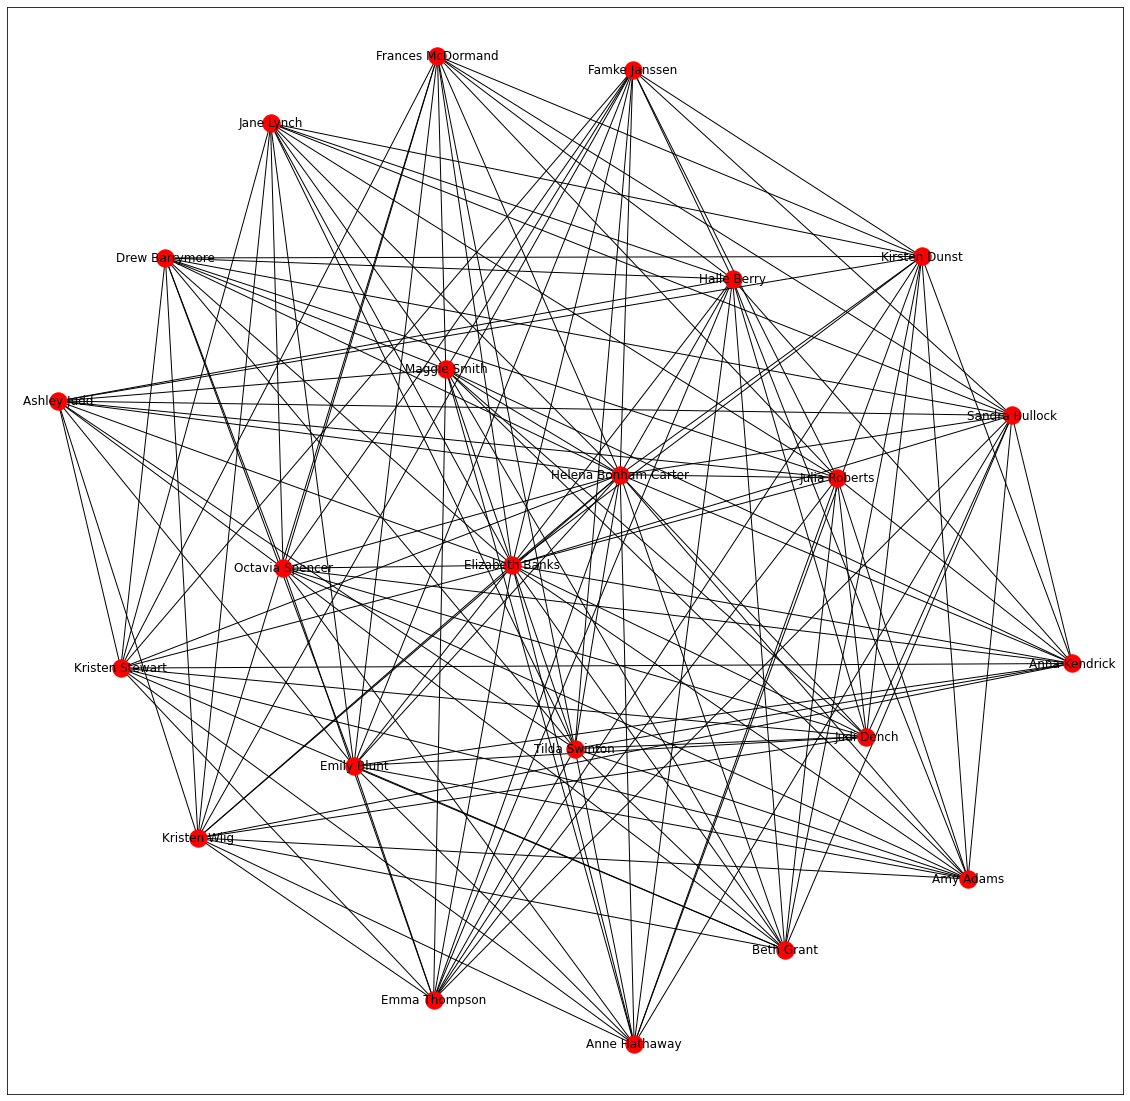

In [98]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_f, node_color='red')


# This shows a network of 23 (# of nodes) female actors who appear in at least 3 movies together. 

In [187]:
print("Kristen Wiig: ", G_f.degree['Kristen Wiig'])
print("Emily Blunt: ", G_f.degree['Emily Blunt'])
print("Helene Bonham Carter: ", G_f.degree['Helena Bonham Carter'])

Kristen Wiig:  13
Emily Blunt:  13
Helene Bonham Carter:  24


In [214]:
nx.degree_centrality(G_f)
degree_centrality_f = pd.DataFrame.from_dict(nx.degree_centrality(G_f), orient='index')

degree_centrality_f.rename(columns={0: 'Network_Centrality'}, inplace=True)
degree_centrality_f

degree_centrality_f.sort_values(by='Network_Centrality', ascending=False, inplace=True)

In [216]:
# add column to dataframe to show not only their network centrality, but individual centrality (e.g. how many edges per node)

degrees_f = sorted([G_f.degree(i) for i in G_f.nodes()], reverse=True)
# degrees_f 
degree_centrality_f['Degrees'] = degrees_f
degree_centrality_f

,Network_Centrality,Degrees
Helena Bonham Carter,1.090909,24
Elizabeth Banks,1.090909,24
Emily Blunt,0.590909,13
Tilda Swinton,0.590909,13
Kristen Wiig,0.590909,13
Julia Roberts,0.590909,13
Sandra Bullock,0.590909,13
Halle Berry,0.590909,13
Kirsten Dunst,0.590909,13
Maggie Smith,0.590909,13


## Network of male actors in movie database:

In [77]:
men100 = pd.read_csv('top100_men.csv')
men100.head()

# drop columns:
men100.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
men100.head()

,movie_id,name
0,862,Tom Hanks
1,8844,Robin Williams
2,949,Robert De Niro
3,949,Jon Voight
4,949,Danny Trejo


#### Top 100 Men in Hollywood

In [51]:
# make dictionary with movie_id and all actors:
m_movie_dict = men100.groupby('movie_id')['name'].apply(list).to_dict()
len(m_movie_dict)

2215

In [135]:
tuples_m = []
for i in m_movie_dict.values():
    for x in combinations(i, 2):
        x = tuple(sorted(x))
        tuples_m.append(x)
        
tuples_m

# now only duplicates:

dup_tuples_m = list(set([e for e in tuples_m if tuples_m.count(e) >= 5]))
dup_tuples_m

[('Brad Pitt', 'George Clooney'),
 ('Owen Wilson', 'Will Ferrell'),
 ('George Clooney', 'Matt Damon'),
 ('Samuel L. Jackson', 'Stan Lee'),
 ('Bill Murray', 'Owen Wilson'),
 ('John Goodman', 'Steve Buscemi'),
 ('Ben Stiller', 'Will Ferrell'),
 ('Ben Stiller', 'Owen Wilson'),
 ('Adam Sandler', 'Steve Buscemi'),
 ('Michael Caine', 'Morgan Freeman'),
 ('Brad Pitt', 'Matt Damon'),
 ('Jonah Hill', 'Seth Rogen'),
 ('Paul Rudd', 'Seth Rogen'),
 ('Channing Tatum', 'Jonah Hill'),
 ('Bill Hader', 'Jonah Hill'),
 ('John Turturro', 'Steve Buscemi'),
 ('Bill Hader', 'Seth Rogen'),
 ('Antonio Banderas', 'Danny Trejo'),
 ('Jonah Hill', 'Paul Rudd'),
 ('James Franco', 'Seth Rogen')]

In [136]:
elementx = [i[0] for i in dup_tuples_m]
elementy = [i[1] for i in dup_tuples_m]

G_m = nx.Graph()

for e in elementx:
    for f in elementy:
        G_m.add_edge(e,f)

In [137]:
print(nx.info(G_m))
# probably will need to make at least 3 shared appearances for a digestible graph

Name: 
Type: Graph
Number of nodes: 23
Number of edges: 170
Average degree:  14.7826


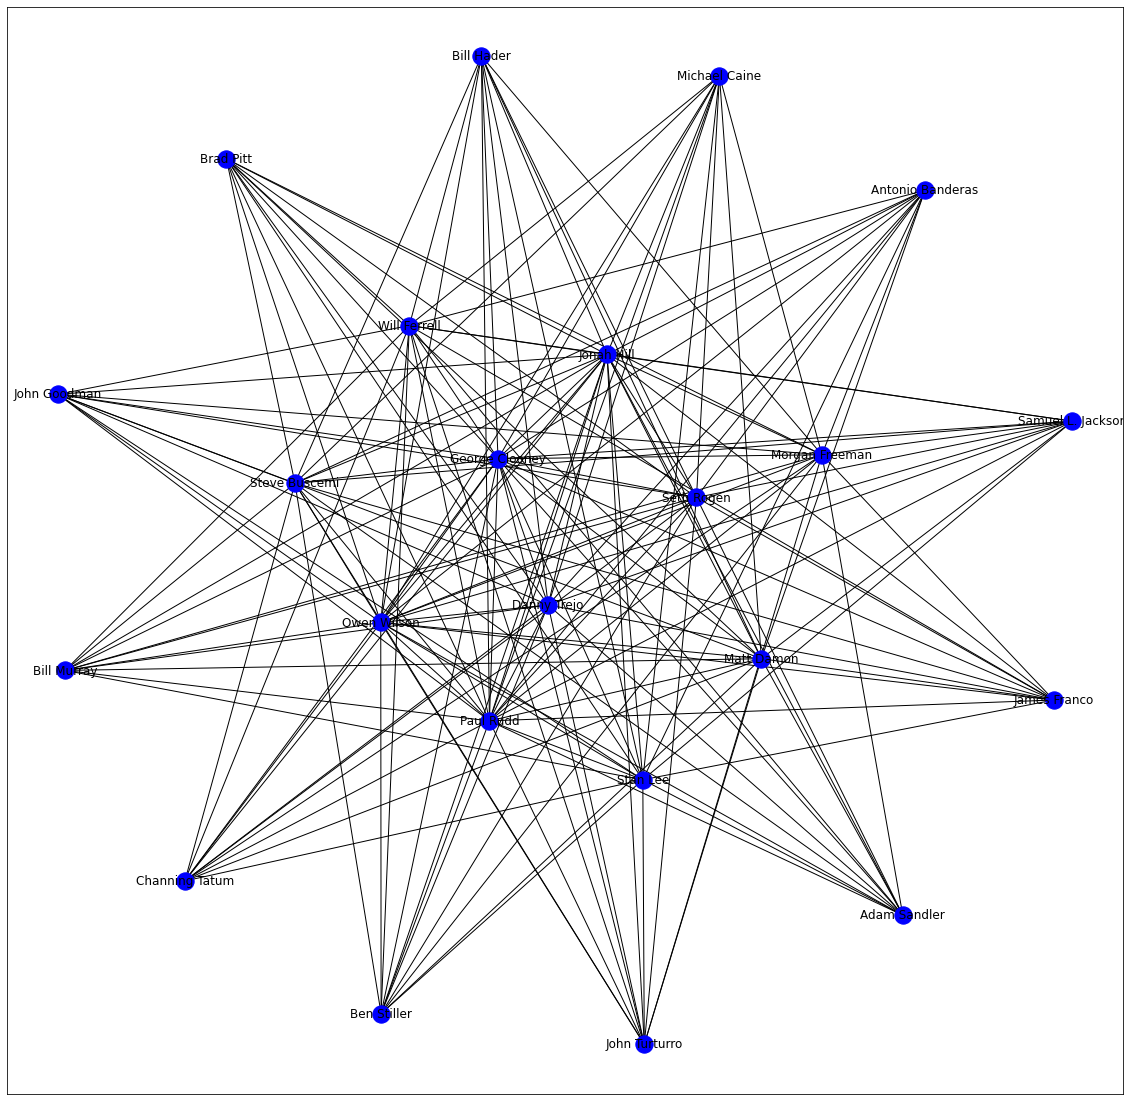

In [141]:

plt.figure(figsize=(20,20))
nx.draw_networkx(G_m, node_color='blue')

# This shows a network of 23 (# of nodes) male actors who appear in at least 5 movies together.

In [142]:
print("James Franco: ", G_m.degree['James Franco'])
print("Owen Wilson: ", G_m.degree['Owen Wilson'])
print("Will Ferrel: ", G_m.degree['Will Ferrell'])

James Franco:  11
Owen Wilson:  24
Will Ferrel:  16


In [207]:
nx.degree_centrality(G_m)
degree_centrality_m = pd.DataFrame.from_dict(nx.degree_centrality(G_m), orient='index')

degree_centrality_m.rename(columns={0: 'Network_Centrality'}, inplace=True)
degree_centrality_m

degree_centrality_m.sort_values(by='Network_Centrality', ascending=False, inplace=True)
degree_centrality_m

degrees_m = sorted([G_m.degree(i) for i in G_m.nodes()], reverse=True)
degrees_m

degree_centrality_m['Degrees'] = degrees_m
degree_centrality_m

,Network_Centrality,Degrees
Paul Rudd,1.090909,24
Owen Wilson,1.090909,24
Jonah Hill,1.090909,24
George Clooney,1.090909,24
Will Ferrell,0.727273,16
Matt Damon,0.727273,16
Stan Lee,0.727273,16
Steve Buscemi,0.727273,16
Morgan Freeman,0.727273,16
Seth Rogen,0.727273,16
